In [1]:
from __future__ import print_function
import glob
import numpy as np
import math
from pyhdf.SD import SD, SDC
import matplotlib
#matplotlib.use('TkAgg')
import pylab
import matplotlib.pyplot as plt
import datetime
import subprocess
from numpy import genfromtxt
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#import plotly.graph_objs as go
from scipy.spatial import cKDTree
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
import bs4
import itertools
import bottleneck as bn
from scipy.signal import lfilter
from itertools import compress
from numpy import inf
import pandas as pd

In [2]:
DATA = np.load('/home/kumarv/tayal007/MODIS_TILES/h08v05.npy')


In [2]:
from numpy import genfromtxt
latitude = genfromtxt('/home/kumarv/tayal007/LongLatCoordinates/h08v05/latitide.csv', delimiter=',')
longitude = genfromtxt('/home/kumarv/tayal007/LongLatCoordinates/h08v05/longitude.csv', delimiter=',')

In [3]:
data2013 = DATA[:,:,586:631]
print (data2013.shape)

(2400, 2400, 45)


In [4]:
def readModisfile(path):
    global mask
    file = SD(path, SDC.READ)
    sds_obj = file.select('Land_Cover_Type_1') 
    mask = np.array(sds_obj.get())
    return mask
mask = readModisfile('/panfs/roc/groups/6/kumarv/tayal007/MODIS_yearly/MCD12Q1.A2013001.h08v05.051.2014308185137.hdf')

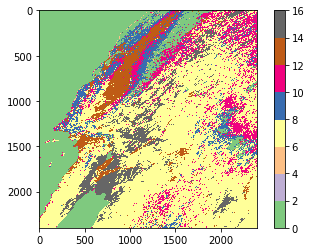

In [94]:
unique, counts = np.unique(mask, return_counts=True)
Tag = ['Water',"Evergreen Needleleaf forest","Evergreen Broadleaf forest","Deciduous Needleleaf forest", "Deciduous Broadleaf forest","Mixed forest","Closed shrublands","Open shrublands","Woody savannas","Savannas","Grasslands","Permanent wetlands"," Croplands","Urban and built-up","Cropland/Natural vegetation mosaic", "Snow and ice","Barren or sparsely vegetated"]
dict1 = {}
dict2 = {}
dict3 = {}
for i,x in enumerate(Tag):
    dict1[x,unique[i]] = counts[i]
    dict2[unique[i]] = x
    dict3[unique[i]] = counts[i]
df = pd.DataFrame(list(sorted(dict1.items())))
plt.imshow(mask, cmap='Accent')
plt.colorbar()
plt.show()

In [12]:
# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0,16,17)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
#scat = ax.scatter(x,y,c=tag,s=np.random.randint(100,500,20),cmap=cmap, norm=norm)
plt.imshow(mask, cmap=cmap, norm=norm)
plt.colorbar()


NameError: name 'mpl' is not defined

In [10]:
df.columns = ['Labels', 'Value']
df = df.sort_values(by="Value", ascending=False)
df

Labels    Value
10                      (Open shrublands, 7)  2508220
15                                (Water, 0)  1249517
8                           (Grasslands, 10)   532066
1         (Barren or sparsely vegetated, 16)   412444
16                       (Woody savannas, 8)   290307
0                           ( Croplands, 12)   229337
7           (Evergreen Needleleaf forest, 1)   225128
2                     (Closed shrublands, 6)   108573
14                  (Urban and built-up, 13)    92679
12                             (Savannas, 9)    82161
9                          (Mixed forest, 5)    18171
3   (Cropland/Natural vegetation mosaic, 14)     8384
11                  (Permanent wetlands, 11)     2367
6            (Evergreen Broadleaf forest, 2)      336
5           (Deciduous Needleleaf forest, 3)      150
13                        (Snow and ice, 15)      124
4            (Deciduous Broadleaf forest, 4)       36

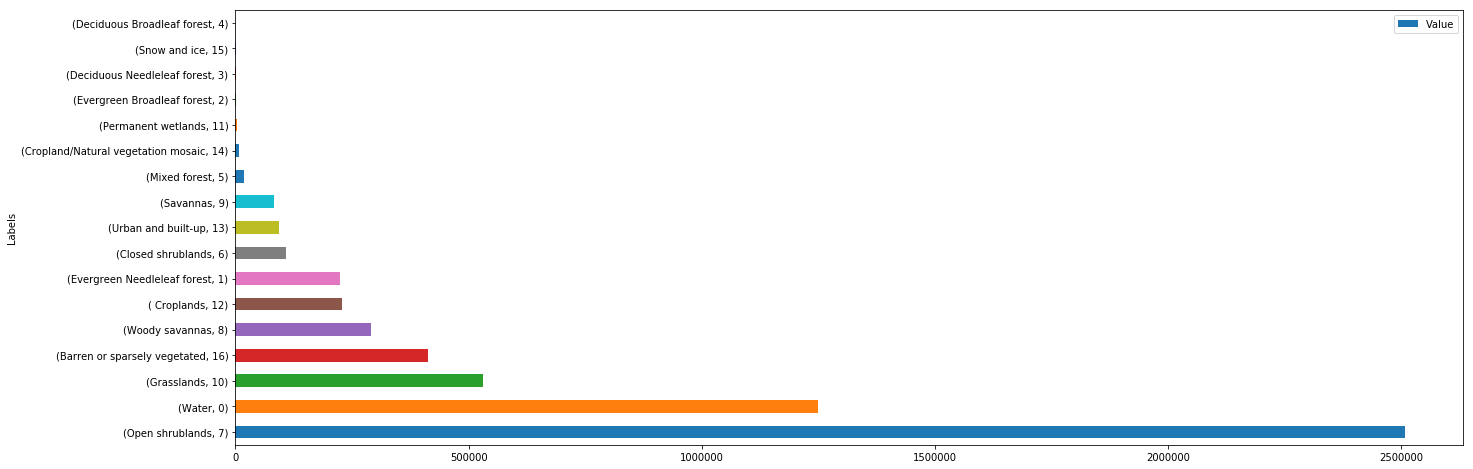

In [11]:
df.plot.barh(x='Labels', y='Value', figsize=(22,8))
fig = plt.gcf()
fig.savefig('output.png')

In [13]:
def percentage(part, shape):
    whole = shape[0] * shape[1] * shape[2]
    return 100 * float(part)/float(whole)

def cleanNDVI(NDVISTACK):
	print ("Missing value in raw data is ", np.count_nonzero(np.isnan(NDVISTACK)),'which is ' ,percentage(np.count_nonzero(np.isnan(NDVISTACK)),NDVISTACK.shape),'%')
	print ("Infinity value in raw data is ", np.count_nonzero(np.isinf(NDVISTACK)),'which is ' ,percentage(np.count_nonzero(np.isinf(NDVISTACK)),NDVISTACK.shape),'%')
	print ("Greater than 1 is ", np.count_nonzero(NDVISTACK > 1),'which is ' ,percentage(np.count_nonzero(NDVISTACK > 1),NDVISTACK.shape),'%')
	print ("Less than -1 is ", np.count_nonzero(NDVISTACK < -1),'which is ' ,percentage(np.count_nonzero(NDVISTACK < -1),NDVISTACK.shape),'%')
	
	CLEANED_DATA = np.copy(NDVISTACK)
	CLEANED_DATA[NDVISTACK == inf] = np.nan
	CLEANED_DATA[NDVISTACK == -inf] = np.nan
	CLEANED_DATA[NDVISTACK > 1] = np.nan
	CLEANED_DATA[NDVISTACK < -1] = np.nan

	print ("After Cleaning Missing value is ", np.count_nonzero(np.isnan(CLEANED_DATA)),'which is ' ,percentage(np.count_nonzero(np.isnan(CLEANED_DATA)),NDVISTACK.shape),'%')
	return CLEANED_DATA;
data2013 = cleanNDVI(data2013)

Missing value in raw data is  16338907 which is  6.3035906635802466 %
Infinity value in raw data is  535416 which is  0.2065648148148148 %


/home/kumarv/tayal007/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning:

invalid value encountered in greater



Greater than 1 is  1946976 which is  0.7511481481481481 %


/home/kumarv/tayal007/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:9: RuntimeWarning:

invalid value encountered in less



Less than -1 is  17982891 which is  6.93784375 %


/home/kumarv/tayal007/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning:

invalid value encountered in greater

/home/kumarv/tayal007/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:15: RuntimeWarning:

invalid value encountered in less



After Cleaning Missing value is  36268774 which is  13.992582561728396 %


In [14]:
data2013[np.isnan(data2013)] = 0
#data2013[data2013 < 0] = 0
print (data2013.shape)

(2400, 2400, 45)


In [15]:
crop_data = data2013[mask==12]
print (crop_data.shape)
noncrop_data = data2013[mask!=12]
print (noncrop_data.shape)

(229337, 45)
(5530663, 45)


In [172]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 2  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
input_dim = 45
# this is our input placeholder
input_img = Input(shape=(input_dim,))
# "encoded" is the encoded representation of the input
encoded = Dense(32, activation='relu')(input_img)
encoded = Dense(16, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

In [173]:
# # from keras.datasets import mnist
# # import numpy as np
# # (x_train, _), (x_test, _) = mnist.load_data()
# # print (x_train.shape)
# # print (x_test.shape)
# # print (x_train.shape[1:])
# # x_train = x_train.astype('float32') / 255.
# # x_test = x_test.astype('float32') / 255.
# x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
# x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
# print (x_train.shape)
# print (x_test.shape)

In [174]:
x_train = crop_data[:200000]
x_test = crop_data[200001:]
print (x_train.shape)
#x_train = x_train.reshape((229337, np.prod(833)))
print (x_train.shape)
print (x_test.shape)

(200000, 45)
(200000, 45)
(29336, 45)


In [175]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [176]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=2048,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 200000 samples, validate on 29336 samples
Epoch 1/100
200000/200000 [==============================] - 1s 5us/step - loss: 0.0494 - val_loss: 0.0462
Epoch 2/100
200000/200000 [==============================] - 1s 3us/step - loss: 0.0403 - val_loss: 0.0370
Epoch 3/100
200000/200000 [==============================] - 1s 3us/step - loss: 0.0347 - val_loss: 0.0330
Epoch 4/100
200000/200000 [==============================] - 1s 3us/step - loss: 0.0319 - val_loss: 0.0313
Epoch 5/100
200000/200000 [==============================] - 1s 3us/step - loss: 0.0306 - val_loss: 0.0303
Epoch 6/100
200000/200000 [==============================] - 1s 3us/step - loss: 0.0297 - val_loss: 0.0295
Epoch 7/100
200000/200000 [==============================] - 1s 3us/step - loss: 0.0291 - val_loss: 0.0290
Epoch 8/100
200000/200000 [==============================] - 1s 3us/step - loss: 0.0286 - val_loss: 0.0285
Epoch 9/100
200000/200000 [==============================] - 1s 3us/step - loss: 0.0281 - val

In [164]:
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
#decoder = Model(encoded_input, decoder_layer(encoded_input))


In [165]:
p = data2013[mask == 12]
print (p[5,:].shape)
print (p[5,:])
#encoder.predict(p[5,:])
autoencoder.predict(p[5,:])
encoder.predict([[5,6],[2,3]])

(45,)
[0.         0.34817073 0.34851542 0.36065573 0.         0.3239913
 0.         0.         0.29309535 0.35412475 0.         0.3617674
 0.         0.6503102  0.70973873 0.32580116 0.29497275 0.49253732
 0.51129836 0.53482145 0.7048937  0.764573   0.51891136 0.4165765
 0.60867536 0.3546472  0.59381896 0.4644128  0.4422435  0.6370553
 0.64155716 0.6384     0.5844806  0.71836436 0.57560855 0.6882063
 0.57819384 0.59921634 0.         0.         0.44440755 0.4110131
 0.         0.         0.        ]


ValueError: Error when checking input: expected input_9 to have shape (45,) but got array with shape (1,)

In [121]:
print (data2013.shape)
print (data2013.reshape(data2013.shape[0] * data2013.shape[1],data2013.shape[2]).shape)
noncrop_data = data2013.reshape(data2013.shape[0] * data2013.shape[1],data2013.shape[2])
x_test = noncrop_data
recons_imgs = autoencoder.predict(x_test,2048,1)
mse = ((noncrop_data - recons_imgs) ** 2).mean(axis=1)

(2400, 2400, 45)
(5760000, 45)
5760000/5760000 [==============================] - 4s 1us/step


In [74]:
print (len(mse))
print (max(mse))
print (min(mse))
max_sim = np.argpartition(mse, -10000)[-10000:] #index of top elements
#print (max_sim)
min_sim = mse.argsort()[:10000] #index of min elements
#print (min_sim)

5760000
1.0164593
0.0003031176


In [75]:
testmask = mask.flatten()
#print (testmask.shape)
#print (mse[max_sim])
#print (dict2[p for p in testmask[max_sim]])
#print (testmask[min_sim])

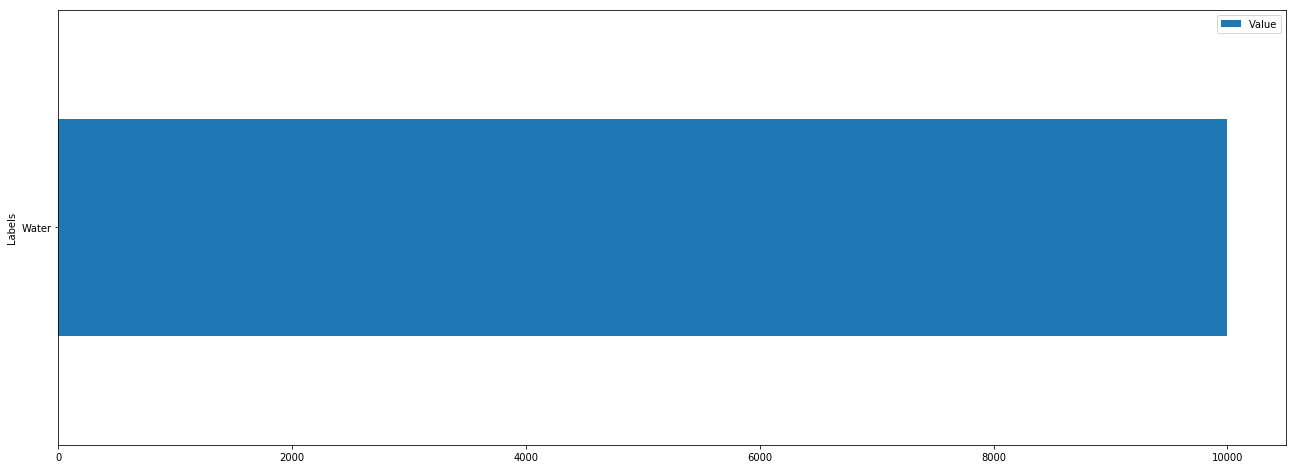

In [76]:
maxdivergentdict = {}

unique, counts = np.unique(testmask[max_sim], return_counts=True)
for i in unique:
    maxdivergentdict[dict2[unique[i]]] = counts[i]
maxdivergentdf = pd.DataFrame(list(sorted(maxdivergentdict.items())))
maxdivergentdf.columns = ['Labels', 'Value']
maxdivergentdf = maxdivergentdf.sort_values(by="Value", ascending=False)
maxdivergentdf.plot.barh(x='Labels', y='Value', figsize=(22,8))

[ 6  7  8  9 10 12 13 16] [   1 8908    4   10  766    1   61  249]


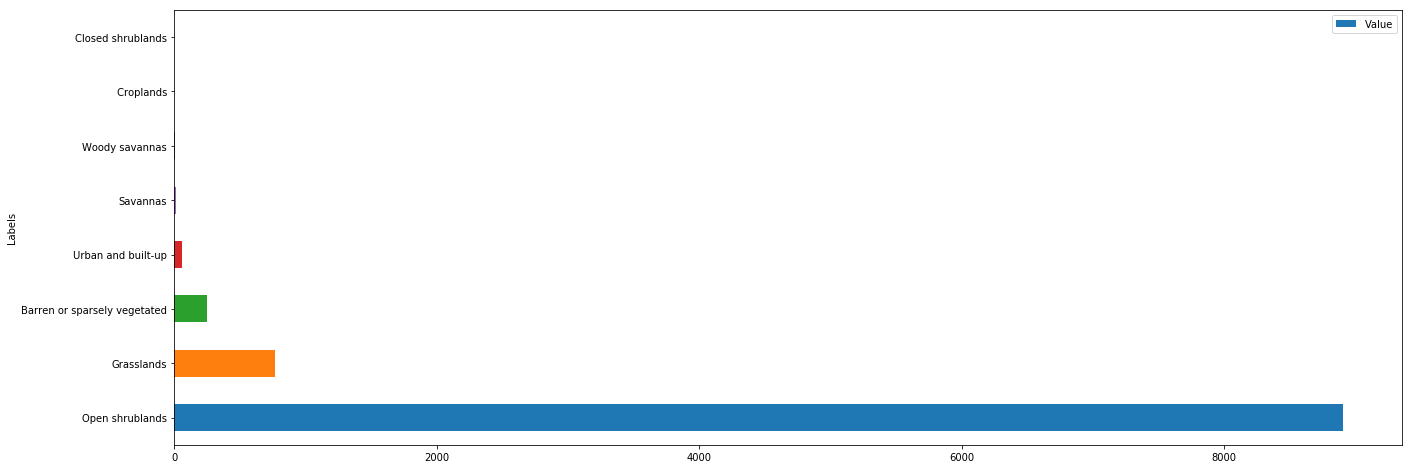

In [77]:
mindivergentdict = {}
unique, counts = np.unique(testmask[min_sim], return_counts=True)
print (unique, counts)
for i in range(len(unique)):
    mindivergentdict[dict2[unique[i]]] = counts[i]
mindivergentdf = pd.DataFrame(list(sorted(mindivergentdict.items())))
mindivergentdf.columns = ['Labels', 'Value']
mindivergentdf = mindivergentdf.sort_values(by="Value", ascending=False)
mindivergentdf.plot.barh(x='Labels', y='Value', figsize=(22,8))

ValueError: Error when checking input: expected input_1 to have shape (45,) but got array with shape (1,)

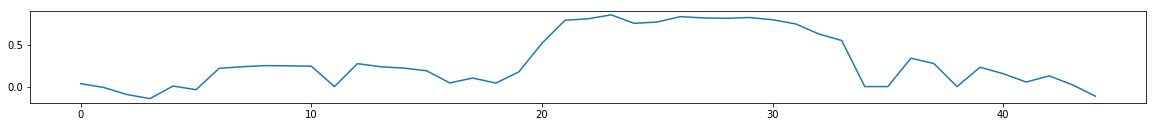

In [139]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt
import random
n = 10  # how many digits we will display
f = plt.figure(figsize=(20, 20
                       ))
for i in range(n):
    # display original
    ax = plt.subplot(n, 1, i + 1)
    m = random.randint(1,20000)
    plt.plot(x_train[m])
    print (encoder.predict(x_train[m]))
    plt.plot(recons_imgs[m],'-r')
    
#     # display reconstruction
#     ax = plt.subplot(2, n, i + 1 + n)
#     plt.plot(recons_imgs[i],'-r')
plt.show()
#fig = plt.gcf()
#f.savefig("foo.pdf", bbox_inches='tight')

412444/412444 [==============================] - 0s 1us/step


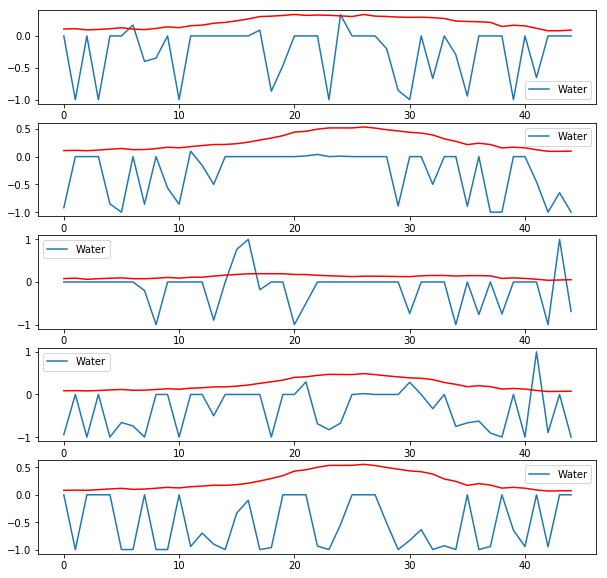

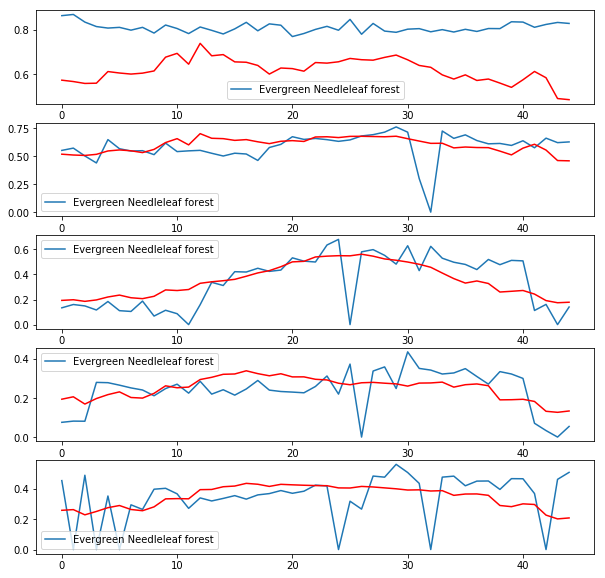

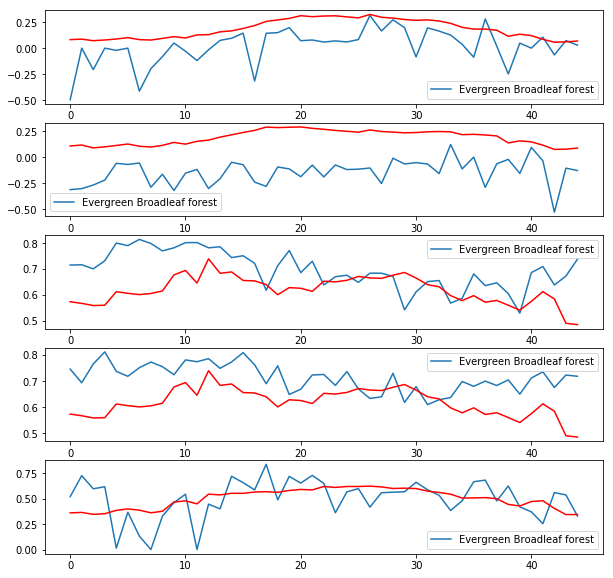

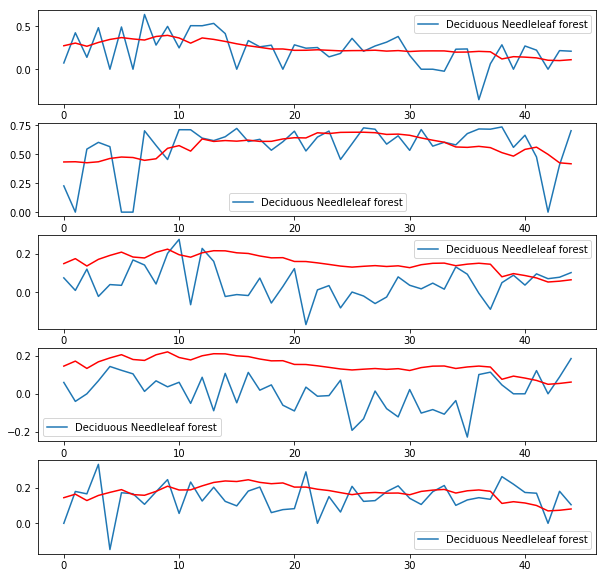

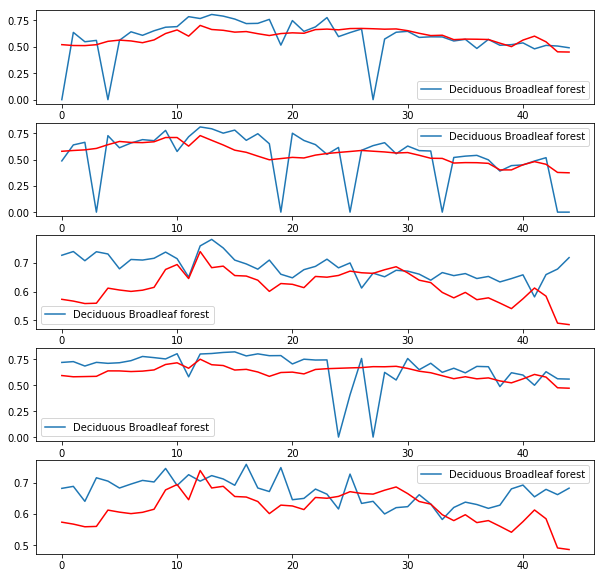

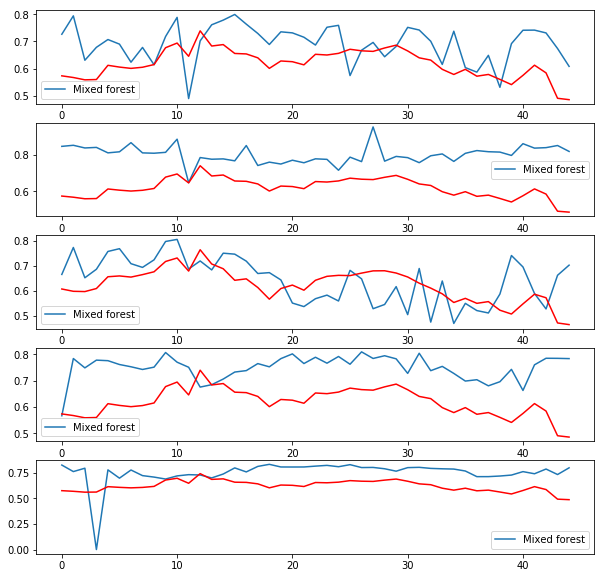

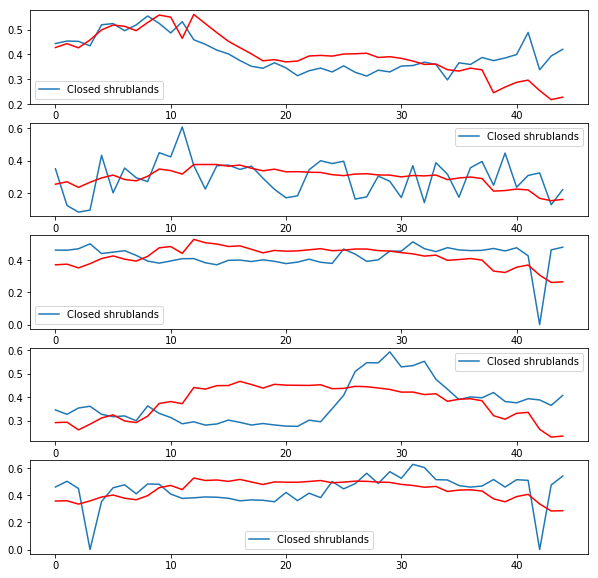

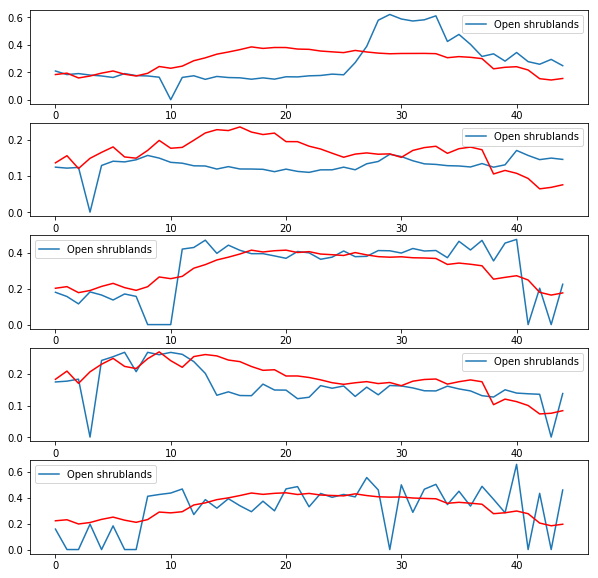

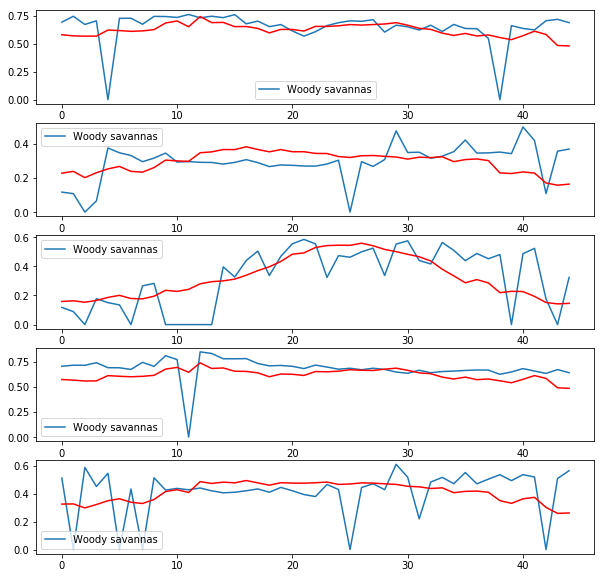

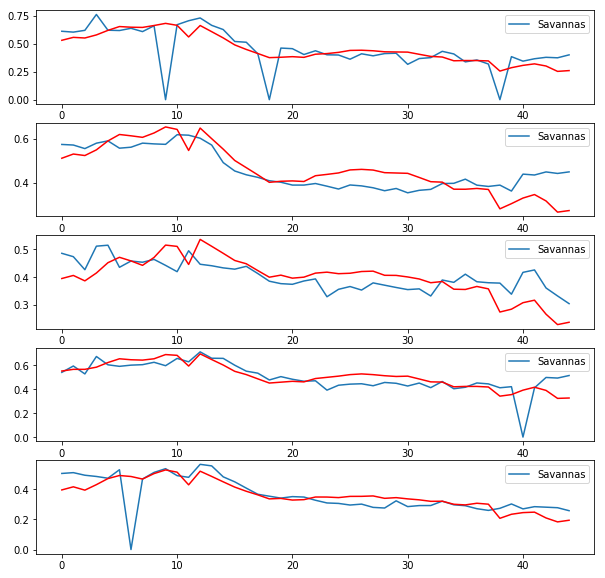

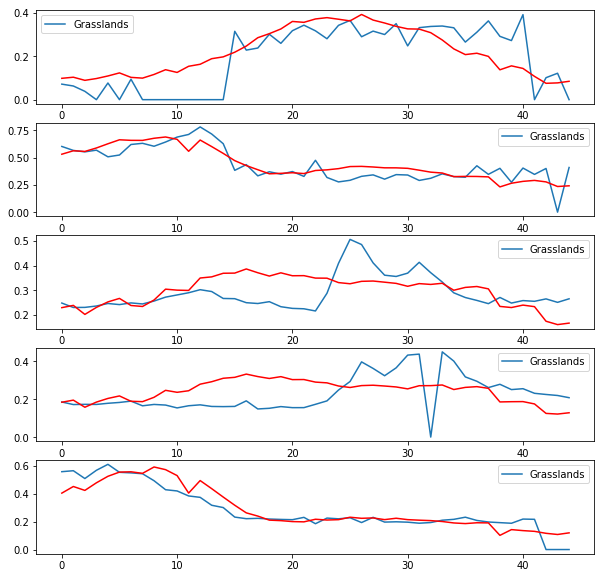

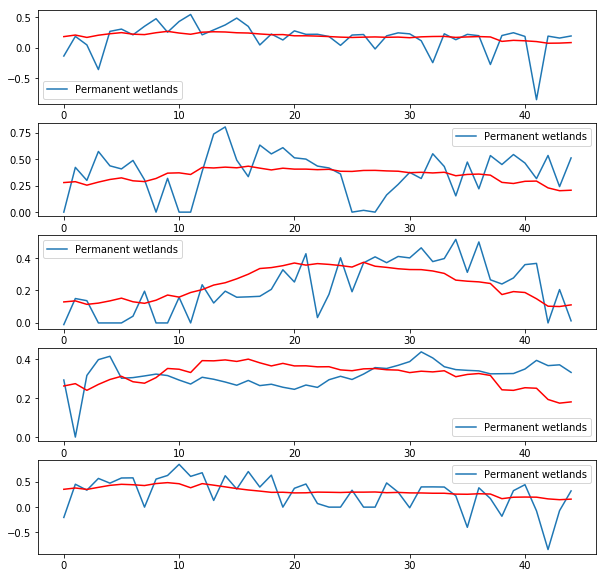

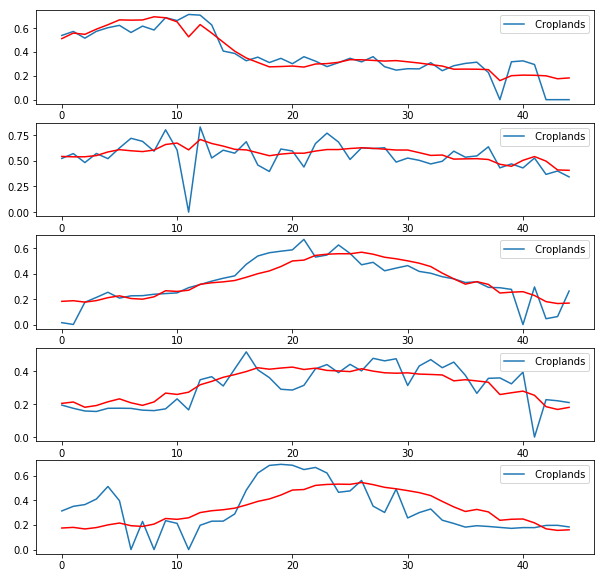

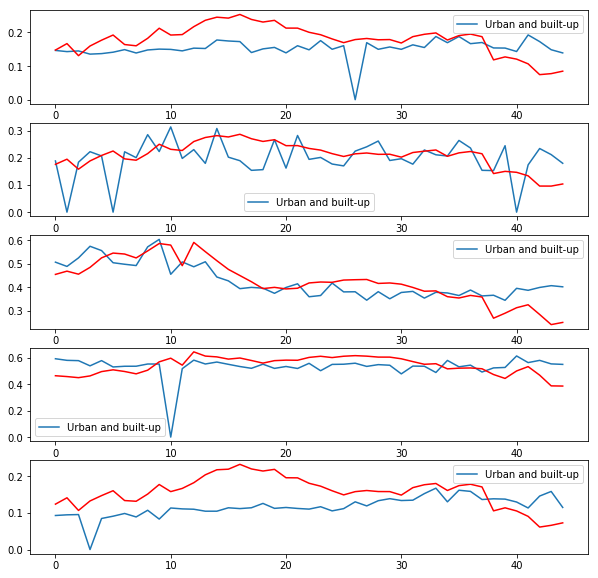

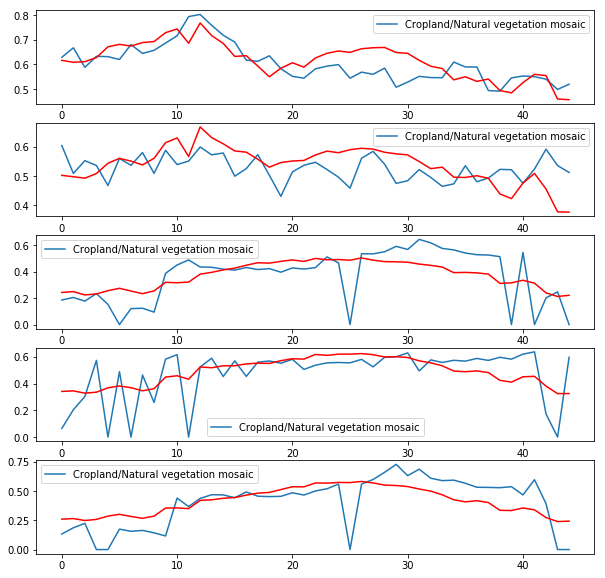

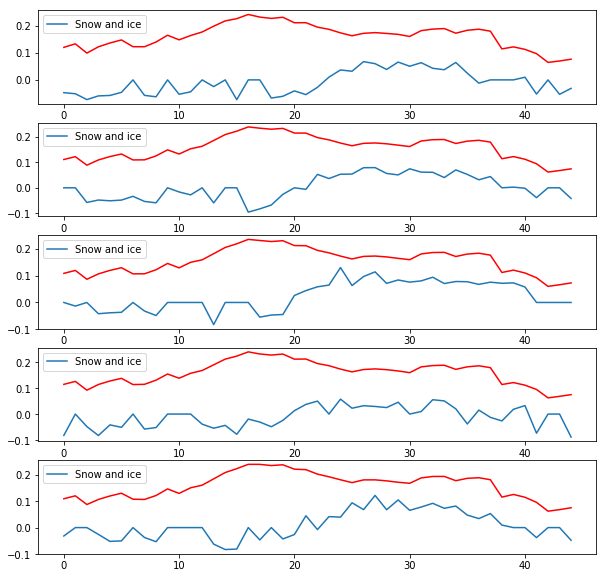

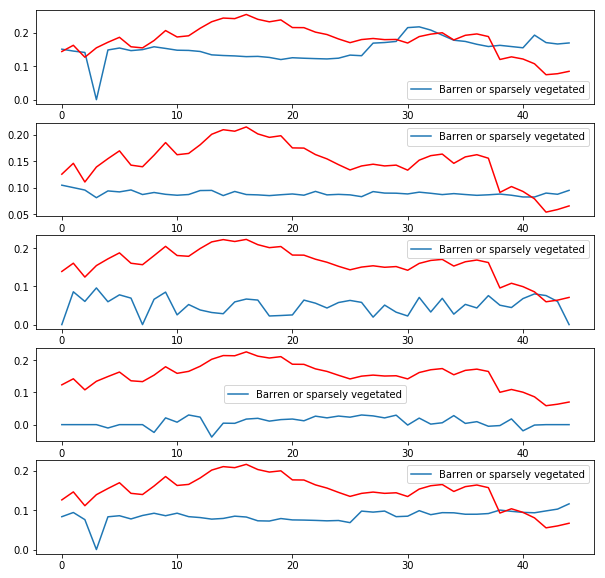

In [177]:
import matplotlib.pyplot as plt
import random
from matplotlib.backends.backend_pdf import PdfPages
pdf = PdfPages("foo_2.pdf")
for j in range(len(dict2)):
    data = data2013[mask==j]
    recons_imgs = autoencoder.predict(data,2048,1)

    n = 5  # how many digits we will display
    f = plt.figure(figsize=(10, 10))
    for i in range(n):
        # display original
        ax = plt.subplot(n, 1, i + 1)
        m = random.randint(1,dict3[j])
        plt.plot(data[m], label = dict2[j])
        plt.plot(recons_imgs[m],'-r')
        plt.legend()
    pdf.savefig(f)
#     # display reconstruction
#     ax = plt.subplot(2, n, i + 1 + n)
#     plt.plot(recons_imgs[i],'-r')
plt.show()
pdf.close()
#fig = plt.gcf()
#f.savefig("foo_16.pdf", bbox_inches='tight')

In [110]:
dict2, dict3

({0: 'Water',
  1: 'Evergreen Needleleaf forest',
  2: 'Evergreen Broadleaf forest',
  3: 'Deciduous Needleleaf forest',
  4: 'Deciduous Broadleaf forest',
  5: 'Mixed forest',
  6: 'Closed shrublands',
  7: 'Open shrublands',
  8: 'Woody savannas',
  9: 'Savannas',
  10: 'Grasslands',
  11: 'Permanent wetlands',
  12: ' Croplands',
  13: 'Urban and built-up',
  14: 'Cropland/Natural vegetation mosaic',
  15: 'Snow and ice',
  16: 'Barren or sparsely vegetated'},
 {0: 1249517,
  1: 225128,
  2: 336,
  3: 150,
  4: 36,
  5: 18171,
  6: 108573,
  7: 2508220,
  8: 290307,
  9: 82161,
  10: 532066,
  11: 2367,
  12: 229337,
  13: 92679,
  14: 8384,
  15: 124,
  16: 412444})

In [ ]:
import os
import torch
import torch.utils.data
from torch import nn, optim
from torch.autograd import Variable
from torch.nn import functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image

In [ ]:
n = 3
q = np.array([[[k for k in range(n)] for j in range(n)] for i in range(n)])
p = np.copy(q[:,:,0])
p[0,0] = 1
print (q[:,:,0])
print (q[:,:,1])
print (q[:,:,2])
q[p!=1] = 0
print (q[:,:,0])
print (q[:,:,1])
print (q[:,:,2])

In [ ]:
# changed configuration to this instead of argparse for easier interaction
CUDA = True
SEED = 1
BATCH_SIZE = 128
LOG_INTERVAL = 10
EPOCHS = 20

# connections through the autoencoder bottleneck
# in the pytorch VAE example, this is 20
ZDIMS = 20
# I do this so that the MNIST dataset is downloaded where I want it
os.chdir("/home/kumarv/tayal007/Downloads")

In [ ]:
torch.manual_seed(SEED)
if CUDA:
    torch.cuda.manual_seed(SEED)

# DataLoader instances will load tensors directly into GPU memory
kwargs = {'num_workers': 1, 'pin_memory': True} if CUDA else {}

# Download or load downloaded MNIST dataset
# shuffle data at every epoch
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=True, download=True,
                   transform=transforms.ToTensor()),
    batch_size=BATCH_SIZE, shuffle=True, **kwargs)

# Same for test data
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=False, transform=transforms.ToTensor()),
    batch_size=BATCH_SIZE, shuffle=True, **kwargs)

In [ ]:
train_loader = torch.from_numpy(CLEANED_DATA)
test_loader = torch.from_numpy(CLEANED_DATA)

In [ ]:
class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()

        # ENCODER
        # 28 x 28 pixels = 784 input pixels, 400 outputs
        self.fc1 = nn.Linear(784, 400)
        # rectified linear unit layer from 400 to 400
        # max(0, x)
        self.relu = nn.ReLU()
        self.fc21 = nn.Linear(400, ZDIMS)  # mu layer
        self.fc22 = nn.Linear(400, ZDIMS)  # logvariance layer
        # this last layer bottlenecks through ZDIMS connections

        # DECODER
        # from bottleneck to hidden 400
        self.fc3 = nn.Linear(ZDIMS, 400)
        # from hidden 400 to 784 outputs
        self.fc4 = nn.Linear(400, 784)
        self.sigmoid = nn.Sigmoid()

    def encode(self, x: Variable) -> (Variable, Variable):
        """Input vector x -> fully connected 1 -> ReLU -> (fully connected
        21, fully connected 22)

        Parameters
        ----------
        x : [128, 784] matrix; 128 digits of 28x28 pixels each

        Returns
        -------

        (mu, logvar) : ZDIMS mean units one for each latent dimension, ZDIMS
            variance units one for each latent dimension

        """

        # h1 is [128, 400]
        h1 = self.relu(self.fc1(x))  # type: Variable
        return self.fc21(h1), self.fc22(h1)

    def reparameterize(self, mu: Variable, logvar: Variable) -> Variable:
        """THE REPARAMETERIZATION IDEA:

        For each training sample (we get 128 batched at a time)

        - take the current learned mu, stddev for each of the ZDIMS
          dimensions and draw a random sample from that distribution
        - the whole network is trained so that these randomly drawn
          samples decode to output that looks like the input
        - which will mean that the std, mu will be learned
          *distributions* that correctly encode the inputs
        - due to the additional KLD term (see loss_function() below)
          the distribution will tend to unit Gaussians

        Parameters
        ----------
        mu : [128, ZDIMS] mean matrix
        logvar : [128, ZDIMS] variance matrix

        Returns
        -------

        During training random sample from the learned ZDIMS-dimensional
        normal distribution; during inference its mean.

        """

        if self.training:
            # multiply log variance with 0.5, then in-place exponent
            # yielding the standard deviation
            std = logvar.mul(0.5).exp_()  # type: Variable
            # - std.data is the [128,ZDIMS] tensor that is wrapped by std
            # - so eps is [128,ZDIMS] with all elements drawn from a mean 0
            #   and stddev 1 normal distribution that is 128 samples
            #   of random ZDIMS-float vectors
            eps = Variable(std.data.new(std.size()).normal_())
            # - sample from a normal distribution with standard
            #   deviation = std and mean = mu by multiplying mean 0
            #   stddev 1 sample with desired std and mu, see
            #   https://stats.stackexchange.com/a/16338
            # - so we have 128 sets (the batch) of random ZDIMS-float
            #   vectors sampled from normal distribution with learned
            #   std and mu for the current input
            return eps.mul(std).add_(mu)

        else:
            # During inference, we simply spit out the mean of the
            # learned distribution for the current input.  We could
            # use a random sample from the distribution, but mu of
            # course has the highest probability.
            return mu

    def decode(self, z: Variable) -> Variable:
        h3 = self.relu(self.fc3(z))
        return self.sigmoid(self.fc4(h3))

    def forward(self, x: Variable) -> (Variable, Variable, Variable):
        mu, logvar = self.encode(x.view(-1, 784))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar


model = VAE()
if CUDA:
    model.cuda()


def loss_function(recon_x, x, mu, logvar) -> Variable:
    # how well do input x and output recon_x agree?
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 784))

    # KLD is Kullback–Leibler divergence -- how much does one learned
    # distribution deviate from another, in this specific case the
    # learned distribution from the unit Gaussian

    # see Appendix B from VAE paper:
    # Kingma and Welling. Auto-Encoding Variational Bayes. ICLR, 2014
    # https://arxiv.org/abs/1312.6114
    # - D_{KL} = 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
    # note the negative D_{KL} in appendix B of the paper
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    # Normalise by same number of elements as in reconstruction
    KLD /= BATCH_SIZE * 784

    # BCE tries to make our reconstruction as accurate as possible
    # KLD tries to push the distributions as close as possible to unit Gaussian
    return BCE + KLD

# Dr Diederik Kingma: as if VAEs weren't enough, he also gave us Adam!
optimizer = optim.Adam(model.parameters(), lr=1e-3)


def train(epoch):
    # toggle model to train mode
    model.train()
    train_loss = 0
    # in the case of MNIST, len(train_loader.dataset) is 60000
    # each `data` is of BATCH_SIZE samples and has shape [128, 1, 28, 28]
    for batch_idx, (data, _) in enumerate(train_loader):
        data = Variable(data)
        if CUDA:
            data = data.cuda()
        optimizer.zero_grad()

        # push whole batch of data through VAE.forward() to get recon_loss
        recon_batch, mu, logvar = model(data)
        # calculate scalar loss
        loss = loss_function(recon_batch, data, mu, logvar)
        # calculate the gradient of the loss w.r.t. the graph leaves
        # i.e. input variables -- by the power of pytorch!
        loss.backward()
        train_loss += loss.data[0]
        optimizer.step()
        if batch_idx % LOG_INTERVAL == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader),
                loss.data[0] / len(data)))

    print('====> Epoch: {} Average loss: {:.4f}'.format(
          epoch, train_loss / len(train_loader.dataset)))


def test(epoch):
    # toggle model to test / inference mode
    model.eval()
    test_loss = 0

    # each data is of BATCH_SIZE (default 128) samples
    for i, (data, _) in enumerate(test_loader):
        if CUDA:
            # make sure this lives on the GPU
            data = data.cuda()

        # we're only going to infer, so no autograd at all required: volatile=True
        data = Variable(data, volatile=True)
        recon_batch, mu, logvar = model(data)
        test_loss += loss_function(recon_batch, data, mu, logvar).data[0]
        if i == 0:
          n = min(data.size(0), 8)
          # for the first 128 batch of the epoch, show the first 8 input digits
          # with right below them the reconstructed output digits
          comparison = torch.cat([data[:n],
                                  recon_batch.view(BATCH_SIZE, 1, 28, 28)[:n]])
          save_image(comparison.data.cpu(),
                     '/home/kumarv/tayal007/Downloads/results/reconstruction' + str(epoch) + '.png', nrow=n)

    test_loss /= len(test_loader.dataset)
    print('====> Test set loss: {:.4f}'.format(test_loss))


for epoch in range(1, EPOCHS + 1):
    train(epoch)
    test(epoch)

    # 64 sets of random ZDIMS-float vectors, i.e. 64 locations / MNIST
    # digits in latent space
    sample = Variable(torch.randn(64, ZDIMS))
    if CUDA:
        sample = sample.cuda()
    sample = model.decode(sample).cpu()

    # save out as an 8x8 matrix of MNIST digits
    # this will give you a visual idea of how well latent space can generate things
    # that look like digits
    save_image(sample.data.view(64, 1, 28, 28),
               '/home/kumarv/tayal007/Downloads/results/sample' + str(epoch) + '.png')

In [ ]:
x = torch.empty(5,3)
print (type(x))

In [ ]:
x.size()

In [ ]:
import os
import torch
import torchvision
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import save_image

if not os.path.exists('./mlp_img'):
    os.mkdir('./mlp_img')


def to_img(x):
    x = 0.5 * (x + 1)
    x = x.clamp(0, 1)
    x = x.view(x.size(0), 1, 28, 28)
    return x


num_epochs = 100
batch_size = 128
learning_rate = 1e-3

img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset = MNIST('./data', transform=img_transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True), nn.Linear(64, 12), nn.ReLU(True), nn.Linear(12, 3))
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(True),
            nn.Linear(12, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True), nn.Linear(128, 28 * 28), nn.Tanh())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


model = autoencoder().cuda()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
    model.parameters(), lr=learning_rate, weight_decay=1e-5)

for epoch in range(num_epochs):
    for data in dataloader:
        img, _ = data
        img = img.view(img.size(0), -1)
        img = Variable(img).cuda()
        # ===================forward=====================
        output = model(img)
        loss = criterion(output, img)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'
          .format(epoch + 1, num_epochs, loss.data[0]))
    if epoch % 10 == 0:
        pic = to_img(output.cpu().data)
        save_image(pic, './mlp_img/image_{}.png'.format(epoch))

torch.save(model.state_dict(), './sim_autoencoder.pth')

In [ ]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()